In [39]:
import pandas as pd
import math
from tqdm import tqdm

In [40]:
df = pd.read_csv("diterpene_shuf.csv")
df

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,t,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,d,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,d,154.6,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2,3,8,7,v501,q,18.8,t,32.5,d,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,2,4,8,6,v785,q,60.6,t,29.3,t,...,59.1,s,39.7,d,142.6,q,18.8,d,36.2,54c
1199,2,4,8,6,v2174,q,166.1,q,62.5,s,...,44.5,d,55.6,d,147.3,q,107.0,t,47.1,52c
1200,2,4,8,6,v1332,t,36.5,d,46.4,t,...,17.3,t,120.4,q,17.8,d,144.4,t,35.9,54c


### Short explaination of the dataset

Each diterpene is described with NMR spectroscopy. In this dataset each spectrum is described by the frequency and multiplicity of all peaks. The skeleton of every diterpene contains 20 carbon atoms. So, for every carbon atom we have its frequency and multiplicity. For multiplicity we have s(singulet), d(doublet), t(triplet), q(quartet). If an atom of carbon is connected to no hydrogen atoms its singulet, if its connected to one hydrogen its doublet, two hydrogens triplet and three hydrogens connected to one carbon atom is quartet. 

Columns a0 to a3 represent how many times s,d,t,q values have accured. \
Column a4 is sample id. \
Columns a5 to a44 tells us the frequency and multiplictiy of each carbon atom. \
Column a45c represents the classification class.

Example, for sample 0: \
In a5 to a44, 's' value has occured 2 times, 'd' 4 times, 't' 8 times and 'q' 6 times. 'v1493' is its ID value. Then for the next 40 columns we have for each of the 20 carbon atoms its multiplicity (s,d,t,q) and frequency. Finally, in a45c we can see that sample 0 belongs to class 52c. 

--------------------

In [41]:
df.describe()

,a0,a1,a2,a3,a6,a8,a10,a12,a14,a16,...,a26,a28,a30,a32,a34,a36,a38,a40,a42,a44
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,...,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2.548253,3.792845,8.782862,4.876040,56.387155,59.147687,59.999551,58.874193,59.536389,59.597471,...,58.794725,56.415308,61.136672,59.793536,58.655524,60.627945,58.849384,57.287329,60.231140,57.614401
std,0.618680,0.715836,0.927123,1.088327,43.868545,45.930797,46.909051,45.465840,46.522244,45.921470,...,46.448512,44.489723,47.351395,44.805028,45.697774,46.396705,46.498059,44.742240,47.950173,44.897128
min,1.000000,2.000000,6.000000,1.000000,7.300000,7.900000,11.600000,7.500000,7.700000,7.500000,...,11.800000,11.600000,8.000000,7.600000,2.400000,7.800000,7.900000,8.100000,7.900000,7.700000
25%,2.000000,4.000000,8.000000,4.000000,27.800000,28.200000,27.725000,28.425000,27.700000,28.725000,...,26.625000,27.025000,28.550000,30.300000,28.700000,30.625000,28.300000,27.302500,28.225000,28.225000
50%,2.000000,4.000000,9.000000,5.000000,39.600000,41.400000,41.200000,40.400000,41.300000,41.000000,...,40.215000,39.500000,41.400000,41.200000,40.700000,42.000000,40.050000,39.700000,40.700000,40.400000
75%,3.000000,4.000000,9.000000,6.000000,66.700000,71.800000,73.187500,72.700000,72.975000,72.175000,...,71.900000,65.375000,74.600000,72.600000,69.900000,72.575000,71.175000,68.825000,72.075000,70.200000
max,4.000000,7.000000,13.000000,8.000000,216.630000,219.100000,220.700000,216.900000,224.700000,221.250000,...,222.500000,215.270000,220.200000,216.900000,218.000000,216.400000,224.500000,216.100000,217.460000,219.300000


In [42]:
#number of unique values in each column
df.nunique()

a0         4
a1         6
a2         8
a3         8
a4      1202
a5         4
a6       711
a7         4
a8       728
a9         4
a10      724
a11        4
a12      719
a13        4
a14      725
a15        4
a16      725
a17        4
a18      712
a19        4
a20      721
a21        4
a22      702
a23        4
a24      686
a25        4
a26      726
a27        4
a28      687
a29        4
a30      741
a31        4
a32      729
a33        4
a34      711
a35        4
a36      720
a37        4
a38      720
a39        4
a40      701
a41        4
a42      726
a43        4
a44      710
a45c      22
dtype: int64

-----------
### Data visualization

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>,
        <AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>,
        <AxesSubplot:title={'center':'a6'}>],
       [<AxesSubplot:title={'center':'a8'}>,
        <AxesSubplot:title={'center':'a10'}>,
        <AxesSubplot:title={'center':'a12'}>,
        <AxesSubplot:title={'center':'a14'}>,
        <AxesSubplot:title={'center':'a16'}>],
       [<AxesSubplot:title={'center':'a18'}>,
        <AxesSubplot:title={'center':'a20'}>,
        <AxesSubplot:title={'center':'a22'}>,
        <AxesSubplot:title={'center':'a24'}>,
        <AxesSubplot:title={'center':'a26'}>],
       [<AxesSubplot:title={'center':'a28'}>,
        <AxesSubplot:title={'center':'a30'}>,
        <AxesSubplot:title={'center':'a32'}>,
        <AxesSubplot:title={'center':'a34'}>,
        <AxesSubplot:title={'center':'a36'}>],
       [<AxesSubplot:title={'center':'a38'}>,
        <AxesSubplot:title={'center'

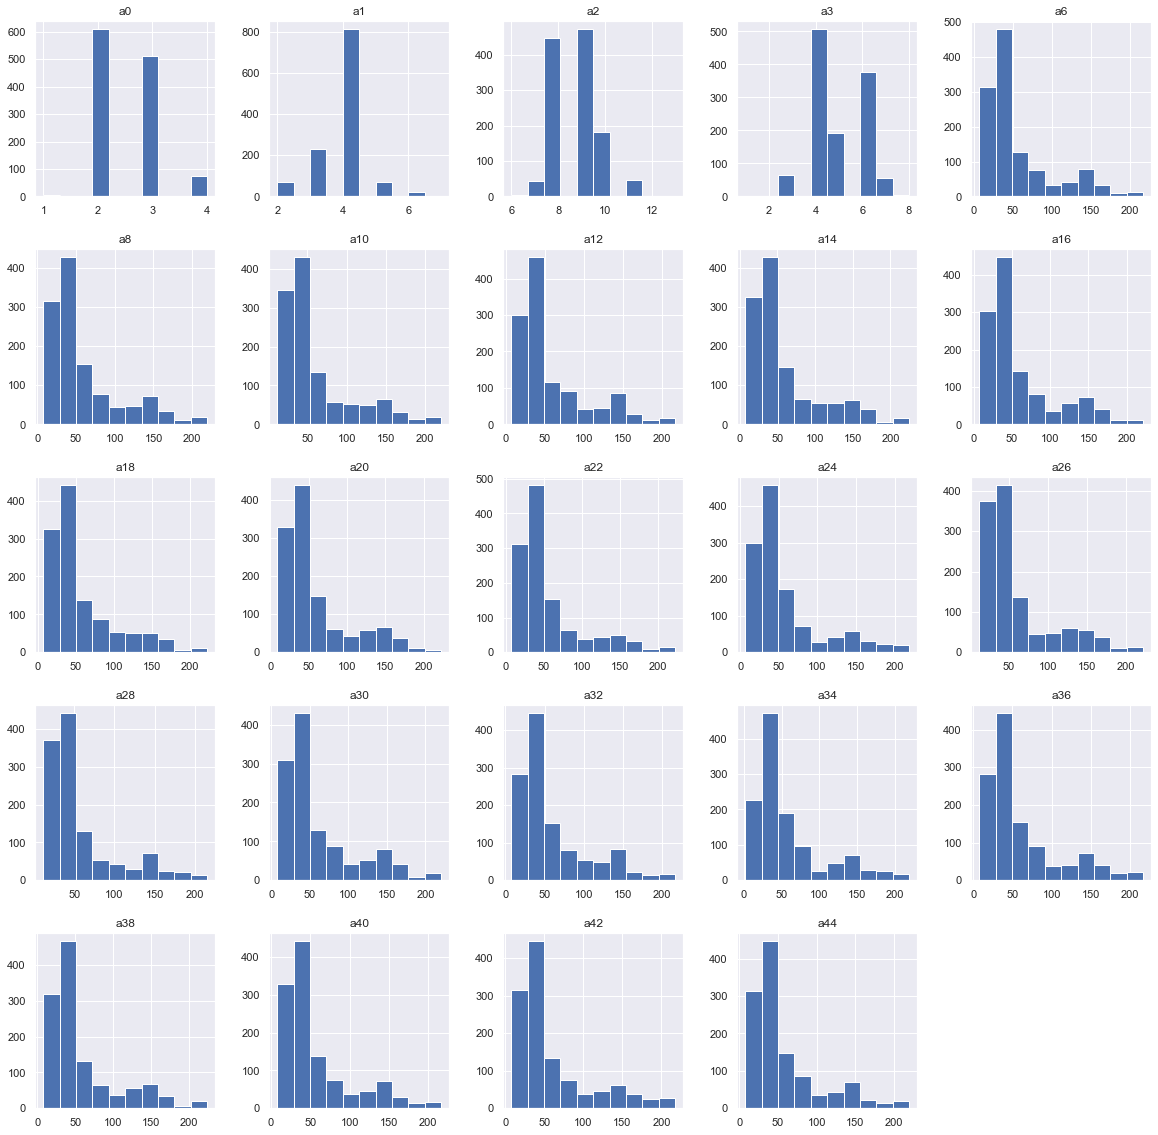

In [43]:
#plot distribution of each column
df.hist(figsize=(20,20))

-----------------------------
### Preprocessing
As decribed in the official paper, some preprocessing can help get better results. For this purpose we will create another dataset df_reduced which will have the reduced multiplicities.

In [44]:
df_reduced = df.copy()

In [45]:
#for each sample of the dataset
col_names = df_reduced.columns
for i in tqdm(range(len(df_reduced))):
    
    for j in range (len(col_names)):

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 64.5 and df_reduced[col_names[j+1]][i] <= 95:
            df_reduced[col_names[j]][i] = 'd'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 96 and df_reduced[col_names[j+1]][i] <= 114:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 115 and df_reduced[col_names[j+1]][i] <= 165:
            df_reduced[col_names[j]][i] = 'd'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 165 and df_reduced[col_names[j+1]][i] <= 188:
            df_reduced[col_names[j]][i] = 'q'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 188 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 't'


        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 64.5 and df_reduced[col_names[j+1]][i] <= 95:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 105 and df_reduced[col_names[j+1]][i] <= 180:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 96 and df_reduced[col_names[j+1]][i] <= 104:
            df_reduced[col_names[j]][i] = 'q'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 180 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 'q'


        if df_reduced[col_names[j]][i] == 't' and df_reduced[col_names[j+1]][i] >= 59 and df_reduced[col_names[j+1]][i] <= 90:
            df_reduced[col_names[j]][i] = 'q'
            
        if df_reduced[col_names[j]][i] == 't' and df_reduced[col_names[j+1]][i] >= 90 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 'q'
        

  0%|          | 0/1202 [00:00<?, ?it/s]C:\Users\Ana\AppData\Local\Temp\ipykernel_15100\2936822903.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col_names[j]][i] = 'q'
C:\Users\Ana\AppData\Local\Temp\ipykernel_15100\2936822903.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col_names[j]][i] = 't'
  0%|          | 2/1202 [00:00<01:28, 13.51it/s]C:\Users\Ana\AppData\Local\Temp\ipykernel_15100\2936822903.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [46]:
df_reduced

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,q,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,q,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,q,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,q,154.6,t,...,49.5,t,38.8,q,71.4,s,36.8,s,46.2,3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2,3,8,7,v501,q,18.8,t,32.5,q,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,2,4,8,6,v785,q,60.6,t,29.3,t,...,59.1,s,39.7,q,142.6,q,18.8,d,36.2,54c
1199,2,4,8,6,v2174,q,166.1,q,62.5,s,...,44.5,d,55.6,q,147.3,q,107.0,t,47.1,52c
1200,2,4,8,6,v1332,t,36.5,d,46.4,t,...,17.3,q,120.4,q,17.8,q,144.4,t,35.9,54c
